In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### 西瓜书的数据集
密度 含糖率 好瓜

In [4]:
data = np.array([
[0.697, 0.460, 1],
[0.774, 0.376, 1],
[0.634, 0.264, 1],
[0.608, 0.318, 1],
[0.556, 0.215, 1],
[0.403, 0.237, 1],
[0.481, 0.149, 1],
[0.437, 0.211, 1],
[0.666, 0.091, 0],
[0.243, 0.267, 0],
[0.245, 0.057, 0],
[0.343, 0.099, 0],
[0.639, 0.161, 0],
[0.657, 0.198, 0],
[0.360, 0.370, 0],
[0.593, 0.042, 0],
[0.719, 0.103, 0],
])

### 可视化数据

In [17]:
data.shape

(17, 3)

### 数据较少 而且主要是为了理解梯度下降算法故不进行样本集划分了

In [20]:
X_train = data[:,0:-1]
y_train = data[:,-1]

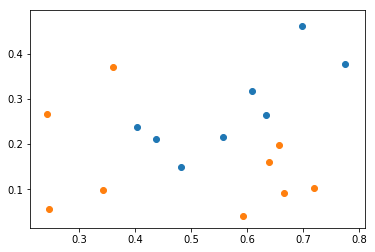

In [21]:
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1])
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1])
plt.show()

### 定义损失函数

In [6]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

### 损失函数的导数

In [7]:
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

### 梯度下降算法

In [8]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    #X_b为增广矩阵  第一列全是一  y = theta *X_b
    theta = initial_theta
    cur_iter = 0
    list_iter = []
    list_x_100 =[]
    while cur_iter < n_iters:
        if cur_iter%100==0:
            list_iter.append(J(theta, X_b, y))
            list_x_100.append(cur_iter)
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1
    #绘制loss曲线
    plt.plot(list_x_100,list_iter)
    plt.show()
    return theta

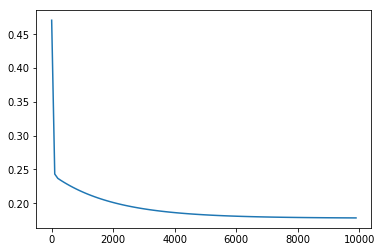

In [9]:
# 将X矩阵的增加一列全是一的同维度矩阵 这样方便算法的向量化
X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
# 将theta全都初始化为theta进行梯度下降
initial_theta = np.zeros(X_b.shape[1])
# eta代表学习速率  n_iters 代表最大迭代次数       eta过大 会导致发散！！！ 

final_theta = gradient_descent(X_b, y_train, initial_theta=initial_theta, eta=0.01,n_iters=10000)

### final即为通过梯度下降法 得到的最小化代价函数 

In [10]:
final_theta

array([ 0.01805208,  2.12850944])

In [11]:
w = final_theta[1:]

In [12]:
b = final_theta[:1]

In [13]:
w

array([ 2.12850944])

In [14]:
b

array([ 0.01805208])

### 使用sklearn

In [22]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [190]:
def getLogisticRegression(degree=2):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("stand",StandardScaler()),
        ("lr",LogisticRegression(C=10))
    ])

In [191]:
def getLogisticRegression2(degree,C=1.0):
    return Pipeline([
        ("stand",StandardScaler()),
        ("lr",SVC(kernel="poly",degree=degree,C=C))
    ])

In [192]:
lr = getLogisticRegression(degree=2)

In [193]:
lrr  = getLogisticRegression2(1,0.8)

D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


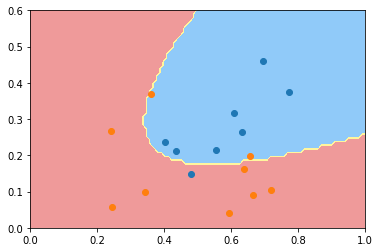

In [194]:
lr.fit(X_train,y_train)

plot_decision_boundary(lr,[0,1,0,0.6])
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1])
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1])
plt.show()

In [195]:
lr.score(X_train,y_train)

0.82352941176470584